In [35]:
import pandas as pd
import matplotlib as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 20)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 300)
pd.set_option("max_colwidth", 40)
pd.reset_option("large_repr")
pd.set_option("expand_frame_repr", True)
df = pd.read_csv('./data/budget.csv')

In [36]:
df.head(15)

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name,Labels,Notes
0,3/24/2023,ORIG CO NAME:VENMO CO,ORIG CO NAME:VENMO CO,1014.90,debit,Shopping,TOTAL CHECKING,NaN,NaN
1,3/24/2023,POS DEBIT IC* INS,POS DEBIT IC* INS,205.00,debit,Groceries,TOTAL CHECKING,NaN,NaN
2,3/24/2023,B&H PHOTO 800-606-6969,B&H PHOTO 800-606-6969,76.20,debit,Electronics & Software,CREDIT CARD,NaN,NaN
3,3/24/2023,POS DEBIT SEAMLSS,POS DEBIT SEAMLSS,42.47,debit,Restaurants,TOTAL CHECKING,NaN,NaN
4,3/24/2023,Investment Income,Investment Income,0.73,credit,Investments,Automated,NaN,NaN
5,3/24/2023,Buy Mutual Fund,Buy Mutual Fund,1.01,debit,Transfer,Automated,NaN,NaN
6,3/24/2023,Investment Income,Investment Income,0.04,credit,Investments,Automated,NaN,NaN
7,3/24/2023,Investment Income,Investment Income,0.24,credit,Investments,Automated,NaN,NaN
8,3/23/2023,YIA YIA`S,YIA YIA`S,17.15,debit,Restaurants,CREDIT CARD,NaN,NaN
9,3/23/2023,MARKETERIA,MARKETERIA,4.08,debit,Groceries,CREDIT CARD,NaN,NaN


In [ ]:

# Convert the 'date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column for the month of each transaction
df['month'] = df['Date'].dt.month

# Group the transactions by month and category, and sum the amounts
monthly_budget = df.groupby(['month', 'Category'])['Amount'].sum().reset_index()

# Print the monthly budget for each category
for month in range(1, 13):
    print(f"Budget for Month {month}")
    print("--------------------")
    month_budget = monthly_budget[monthly_budget['month'] == month]
    for _, row in month_budget.iterrows():
        print(f"{row['Category']}: ${row['Amount']:.2f}")
    print("\n")

In [43]:


# Convert the 'date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column for the month of each transaction
df['month'] = df['Date'].dt.month

# Create a new column for the transaction amount, depending on transaction type
df.loc[df['Transaction Type'] == 'credit', 'Transaction Amount'] = df['Amount']
df.loc[df['Transaction Type'] == 'debit', 'Transaction Amount'] = -df['Amount']

# Group the transactions by month and transaction type, and sum the transaction amounts
monthly_budget = df.groupby(['month', 'Category'])['Transaction Amount'].sum().reset_index()

# Print the monthly budget for each transaction type
for month in range(1, 13):
    print(f"Budget for Month {month}")
    print("--------------------")
    month_budget = monthly_budget[monthly_budget['month'] == month]
    for _, row in month_budget.iterrows():
        print(f"{row['Category']}: ${row['Transaction Amount']:.2f}")
    print("\n")


Budget for Month 1
--------------------
ATM Fee: $-2.50
Alcohol & Bars: $-452.00
Apps: $-48.98
Auto & Transport: $-333.84
Bank Fee: $-5.00
Bills & Utilities: $-17.00
Books: $-56.73
Cash & ATM: $-23.25
Chase Investment Account: $4647.00
Clothing: $-2178.60
Coffee Shops: $-298.95
Credit Card Payment: $4356.19
Crypto: $-2500.00
Doctor: $-489.00
Electronics & Software: $-191.92
Entertainment: $-227.53
Eyecare: $-190.00
Fast Food: $-548.31
Fees & Charges: $-0.37
Food & Dining: $-233.79
Food Delivery: $-613.93
Fraud Reimbursed: $-63.14
Games: $-21.76
Gas & Fuel: $-101.79
Gift: $-151.14
Groceries: $-1821.12
Gym: $-757.63
Hair: $-75.00
Hobbies: $-20.00
Home Improvement: $-21.71
Income: $1194.33
Internet: $-342.99
Investments: $0.09
Laundry: $-60.00
MSK Paycheck: $24090.47
Misc Expenses: $-185.26
Mortgage & Rent: $-5202.00
Motorcycle Garage: $-447.76
Motorcycle Insurance: $-61.50
Movies & DVDs: $-180.36
NYP Paycheck: $2937.98
Newspapers & Magazines: $-168.73
Pharmacy: $-209.00
Public Transporta

Text(0, 0.5, 'Amount')

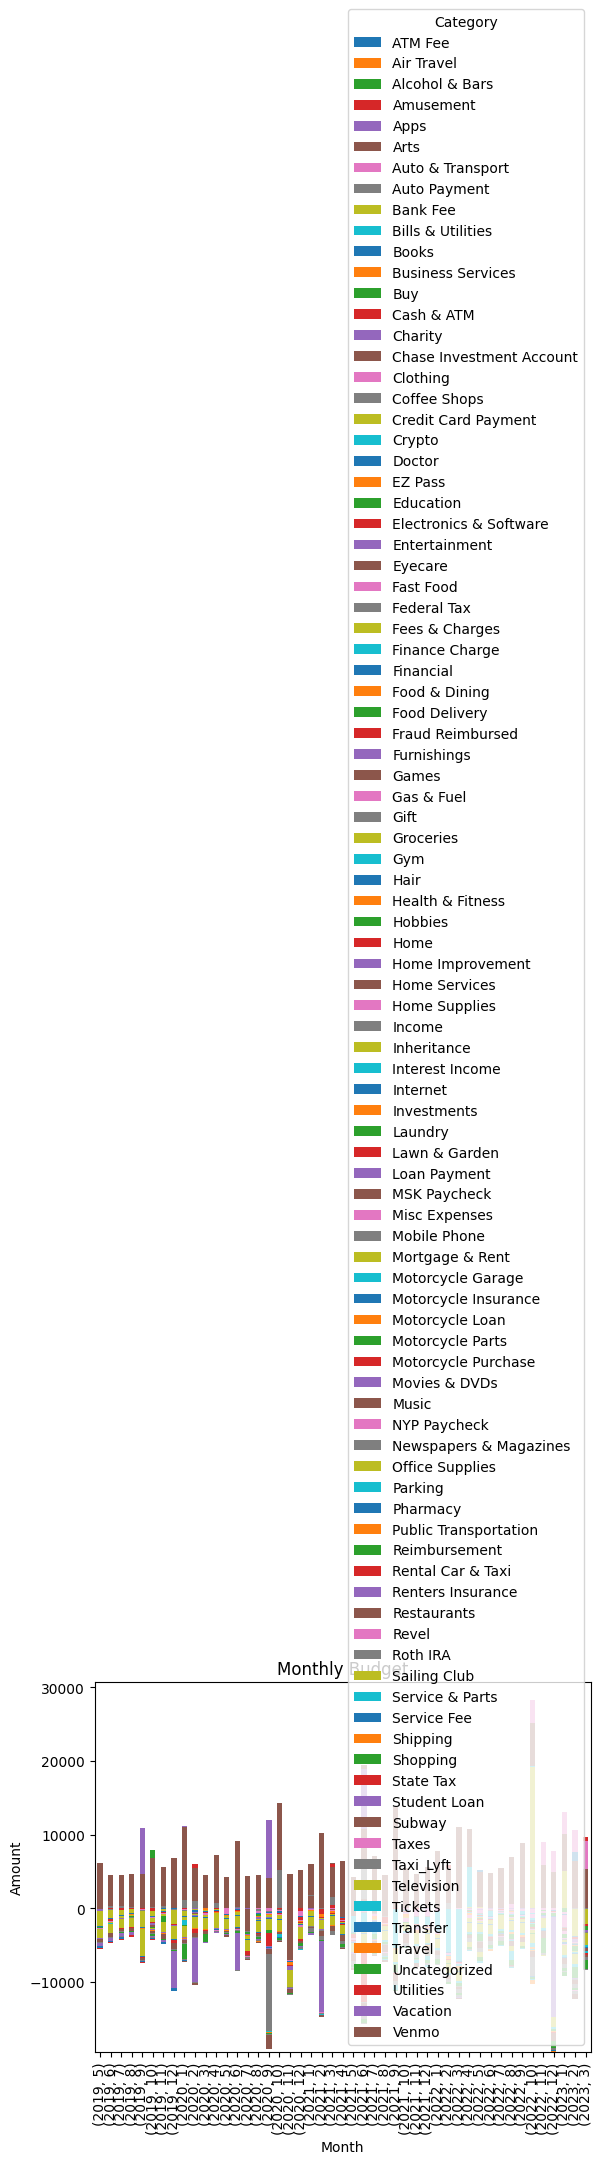

In [55]:
df = pd.read_csv('./data/budget.csv')
# Convert the 'date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column for the month of each transaction
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df.loc[df['Transaction Type'] == 'credit', 'Transaction Amount'] = df['Amount']
df.loc[df['Transaction Type'] == 'debit', 'Transaction Amount'] = -df['Amount']

monthly_budget = df.groupby(['year', 'month', 'Category'])['Transaction Amount'].sum().reset_index()

# Pivot the monthly_budget DataFrame to create separate columns for credit and debit
monthly_budget_pivot = monthly_budget.pivot(index=['year', 'month'], columns='Category', values='Transaction Amount')

# Plot the monthly budget as a bar chart
ax = monthly_budget_pivot.plot(kind='bar', stacked=True)

# Set the chart title and axis labels
ax.set_title('Monthly Budget')
ax.set_xlabel('Month')
ax.set_ylabel('Amount')


